In [1]:
import sys, os
import warnings
import h5py
import numpy as np
from joblib import delayed, Parallel
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.metrics import pairwise_distances

from hyppo.independence import KMERF
from scipy.stats._stats import _center_distance_matrix

sys.path.append(os.path.realpath('..'))

In [2]:
sns.set(color_codes=True, style='white', context='talk', font_scale=1.5)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE)

In [3]:
# import mat file
arrays = {}
f = h5py.File("../kmerf/real_data/proteomics.mat")
for k, v in f.items():
    arrays[k] = np.array(v)

In [4]:
def compute_pvalue(D, A, per, i):
    C = A[per.ravel(), i]
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        pvalue = KMERF().test(C, D, reps=10000)[1]
    return pvalue


def generate_perd(labelindall, vs_type):
    if vs_type == "pancvsnormal":
        per = np.logical_or(labelindall == 1, labelindall == 2)
    elif vs_type == "pancvsall":
        per = np.logical_and(labelindall != 2, labelindall < 5)
        labelindall[per] = 1
        per = labelindall < 5
    else:
        raise ValueError("vs_type must be pancvsnormal or pancvsall")
        
    D = labelindall[per]
        
    return per, D


def generate_pvalues(arrays, vs_type="pancvsnormal"):
    labelindall = arrays['LabelIndAll']
    A = arrays['A']
    
    per, D = generate_perd(labelindall, vs_type)
    
    pvalues = Parallel(n_jobs=-1, verbose=100)(
        [delayed(compute_pvalue)(D, A, per, i) for i in range(A.shape[1])]
    )
    return pvalues

In [5]:
panc_vs_normal = generate_pvalues(arrays, vs_type="pancvsnormal")
np.savetxt('../kmerf/real_data/panc_vs_normal.csv', panc_vs_normal, delimiter=',')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   35.3s
[Paralle

[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  1.0min
[Paralle

In [6]:
panc_vs_all = generate_pvalues(arrays, vs_type="pancvsall")
np.savetxt('../kmerf/real_data/panc_vs_all.csv', panc_vs_all, delimiter=',')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   37.7s
[Paralle

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:  1.1min
[Paralle

In [7]:
def plot_real_data():
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    panc_vs_normal = np.genfromtxt('../kmerf/real_data/panc_vs_normal.csv', delimiter=',')
    panc_vs_all = np.genfromtxt('../kmerf/real_data/panc_vs_all.csv', delimiter=',')
    
    ax1.scatter(panc_vs_normal, panc_vs_all, c="#4daf4a", s=75)
    ax1.scatter(panc_vs_normal[180], panc_vs_all[180], c="#e41a1c", s=100)
    ax1.text(panc_vs_normal[180]+1e-6, panc_vs_all[180]+1e-6, c="#e41a1c", s="neurogranin")
#     ax1.axhline(y=0.003, linestyle='--')
#     ax1.axvline(x=0.003, linestyle='--')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("p-values for Panc vs Norm")
    ax1.set_ylabel("p-values for Panc vs All")
#     ax1.set_xticks([1e-2, 1e-1, 1e0])
#     ax1.set_yticks([1e-2, 1e-1, 1e0])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_title('Cancer Biomarker Discovery', pad=20)
    
    # See https://elifesciences.org/articles/41690#fig4
    # Same peptide identified, so identical tp/fp
    labels = ["False Positives", "True Positives"]
    kmerf = [2, 5]
    hsic = [4, 5]
    hhg = [2, 1]
    width = 0.25  # the width of the bars
    r2 = np.arange(len(kmerf))
    r1 = [x - width for x in r2]
    r3 = [x + width for x in r2]
    x = np.arange(len(labels))  # the label locations
    ax2.bar(r1, kmerf, width, color="#e41a1c", label="KMERF")
    ax2.bar(r2, hsic, width, color="#4daf4a", label="Hsic")
    ax2.bar(r3, hhg, width, color="#984ea3", label="HHG")
    ax2.set_ylabel("# True / False Positives")
    ax2.set_ylim([0, 8])
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels)
    plt.legend()
    ax2.set_title('Biomarker kNN Classification', pad=20)
    leg = plt.legend(bbox_to_anchor=(0.8, 0.9), bbox_transform=plt.gcf().transFigure,
                     ncol=1, loc='upper center', labelspacing=.1)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    plt.subplots_adjust(wspace=0.50)
    plt.savefig('../kmerf/figs/real_data.pdf', transparent=True, bbox_inches='tight')

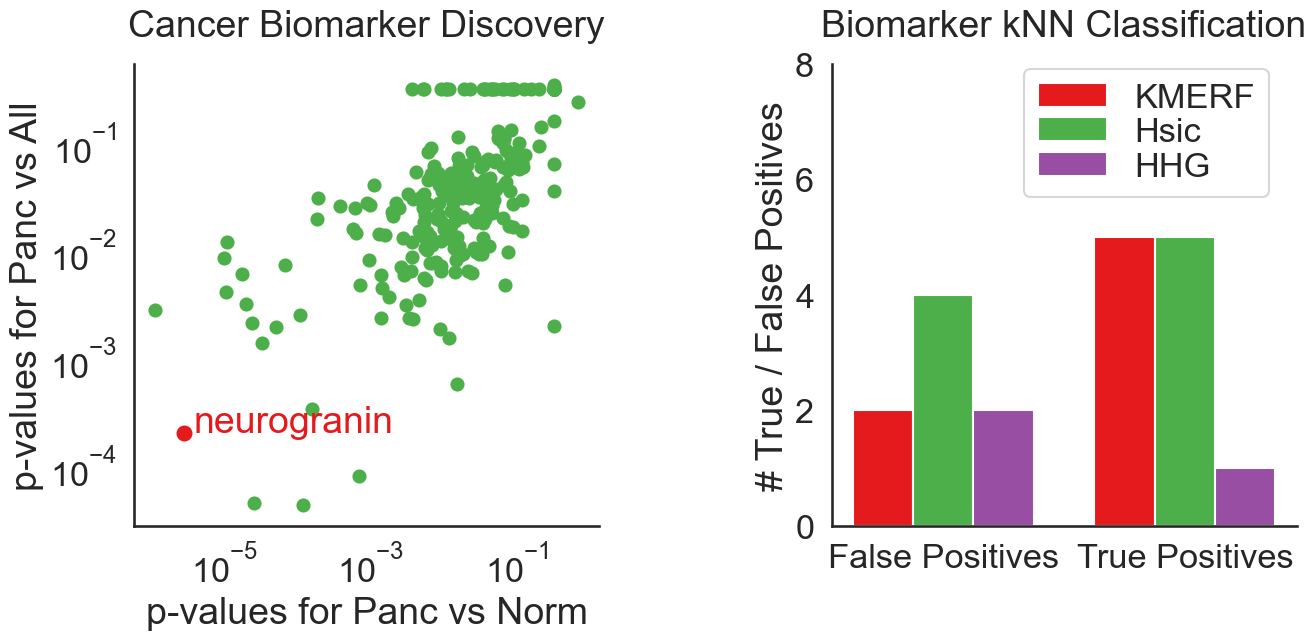

In [8]:
plot_real_data()